<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Optimización</div><br>
    <div style="font-size: x-large; color:gray">Práctica de programación de algoritmos</div><br>
    <div style="font-size: large">María Barroso y Gloria del Valle</div><br></div><hr> 
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

# Tarea 1
- Codificar el método de búsqueda Dicotómica.
- Codificar el método de búsqueda de la Sección Áurea.

In [3]:
from opt_search import dichotomic_search, golden_search

### Búsqueda Dicotómica

A continuación, se muestra a través de un ejemplo, el problema de minimización de búsqueda dicotómica utilizando la función *dichotomic_search* implementado en *search_methods.py*.

Se quiere minimizar la función 

$$f_1(x) = 3x^2-1$$

cuyo mínimo sabemos que se alcanza en $f_1(x^*)=-1$ para $x^*=0$.

Minimum value at (-0.0006, 0.0001) after 14 iteration computed in 0.0001 seconds.


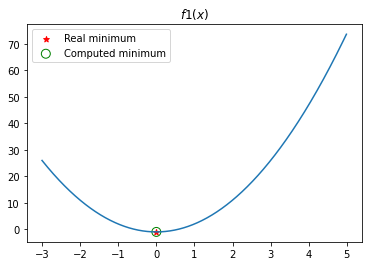

In [4]:
def f1(x): return 3*x**2 - 1

a, b = -3, 5
interval_length = 0.001
epsilon = 0.0001

start_time = timeit.default_timer()
lower_bound, upper_bound, total_it = dichotomic_search(f1, a, b, interval_length, epsilon)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at ({lower_bound:.4f}, {upper_bound:.4f}) after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = (upper_bound-lower_bound)/2
real_minimum = 0.0

x = np.arange(a, b, 0.01)
plt.plot(x, f1(x))
plt.title(r"$f1(x)$")
plt.scatter(real_minimum,f1(real_minimum), color="red", marker="*", label="Real minimum")
plt.scatter(computed_minimum, f1(computed_minimum), s=80, facecolors='none', edgecolors='g', label="Computed minimum")
plt.legend(loc = 'best')
plt.show()

### Búsqueda Sección Áurea

A continuación, se muestra a través del mismo ejemplo, el problema de minimización de búsqueda sección aurea utilizando la función *golden_search* implementado en *search_methods.py*.

Minimum value at (-0.0006, 0.0003) after 19 iteration computed in 0.0001 seconds.


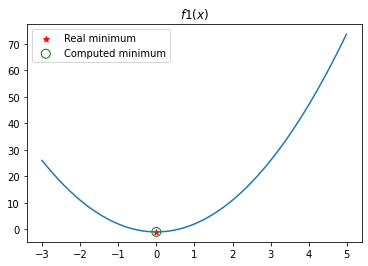

In [5]:
a, b = -3, 5
interval_length = 0.001

start_time = timeit.default_timer()
lower_bound, upper_bound, total_it = golden_search(f1, a, b, interval_length)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at ({lower_bound:.4f}, {upper_bound:.4f}) after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = (upper_bound-lower_bound)/2
real_minimum = 0.0

x = np.arange(a, b, 0.01)
plt.plot(x, f1(x))
plt.title(r"$f1(x)$")
plt.scatter(real_minimum,f1(real_minimum), color="red", marker="*", label="Real minimum")
plt.scatter(computed_minimum, f1(computed_minimum), s=80, facecolors='none', edgecolors='g', label="Computed minimum")
plt.legend(loc = 'best')
plt.show()

# Tarea 2
- Codificar el método de Hooke y Jeeves.
- Codificar el método del gradiente

In [6]:
from opt_search import HJ_search

### Método de Hooke y Jevees

Se muestra, a través de un ejemplo, el método de optimización de Hooke y Jevees. Para la búsqueda del $\lamdba$ mínimo en los pasos 1 y 2 del algoritmo visto en clase, se utiliza una variante del método que utiliza dos parámetro complementarios: $\beta$ y $\alpha$ que miden la tasa de reducción y el factor de aceleración del algorito respectivamente.

La función a minimizar es la siguiente parábola aplanada:

$$f_2(x)= (x_1-2)^4 + (x_1 - 2*x_2)^2$$

In [7]:
def f2(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-2)**4 + (x1 - 2*x2)**2

Minimum value at [2.10205078 1.05175781] after 67 iteration computed in 0.0001 seconds.


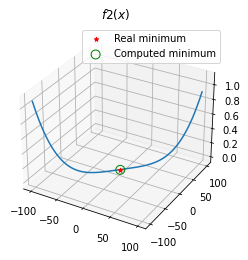

In [8]:
start_time = timeit.default_timer()
xk_min , total_it = HJ_search(f2, xk = np.array([0, 3]), lambd = 3.0)

print(f'Minimum value at {xk_min} after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = xk_min
real_minimum = np.array([2.0, 1.0])

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = np.linspace(-100, 100, 1000)
yline = np.linspace(-100, 100, 1000)
x = np.array(list(zip(xline,yline)))
zline = list(map(f2, x))

ax.plot3D(xline, yline, zline)
plt.title(r"$f2(x)$")
ax.scatter3D(real_minimum[0], real_minimum[1], f2(real_minimum), color="red", marker="*", label="Real minimum")
ax.scatter3D(computed_minimum[0], computed_minimum[1], f2(computed_minimum),  color="green", s = 80, facecolor = 'none', marker="o", label="Computed minimum")
plt.legend(loc = 'best')
plt.show()